<a href="https://colab.research.google.com/github/mb8655/Python/blob/main/Intro_to_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas
## install the necessary libraries to connect to MySQL and to read Excel files.

In [2]:
!pip3 install -U -q PyMySQL sqlalchemy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.0 MB/s eta 0:00:00


import pandas library and related libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sqlite3.dbapi2 import connect

improve the visual style of the plots

In [4]:
# render our plots with high resolution
%config InlineBackend.figure_format = 'retina'

In [5]:
# make the graphs a bit bigger
matplotlib.style.use(["seaborn-v0_8-talk", "seaborn-v0_8-ticks", "seaborn-v0_8-whitegrid"])

In [6]:
# setting the default figure size for pandas plots
pd.options.plotting.backend = 'matplotlib'
plt.rcParams['figure.figsize'] = [10, 3]

#LOAD DATA
from MySQL server using SQL
We will use a dataset with restaurant inspection results in NYC (https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j/about_data). The dataset has been cleaned up, normalized, and stored in our MySQL database, under the doh_restaurants database.

In [7]:
import os
from sqlalchemy import create_engine
from sqlalchemy import text

conn_string = 'mysql+pymysql://{user}:{password}@{host}/{db}?charset=utf8mb4'.format(
    host = 'db.ipeirotis.org',
    user = 'student',
    password = 'dwdstudent2025',
    db = 'doh_restaurants',
    encoding = 'utf8mb4')

engine = create_engine(conn_string)

Query using read_sql command

In [8]:
# returns back restaurants in the DOH database

sql = '''
        SELECT R.CAMIS, R.DBA, R.BUILDING, R.STREET, R.ZIPCODE, R.BORO,
          R.CUISINE_DESCRIPTION, R.LATITUDE, LONGITUDE
        FROM doh_restaurants.restaurants R
        '''

with engine.connect() as connection:
  restaurants = pd.read_sql(text(sql), con = connection)

print(restaurants)

          CAMIS                             DBA BUILDING              STREET  \
0      30075445           MORRIS PARK BAKE SHOP     1007  MORRIS PARK AVENUE   
1      30112340                         WENDY'S      469     FLATBUSH AVENUE   
2      30191841  DJ REYNOLDS PUB AND RESTAURANT      351    WEST   57 STREET   
3      40356018                RIVIERA CATERERS     2780    STILLWELL AVENUE   
4      40356483              WILKEN'S FINE FOOD     7114            AVENUE U   
...         ...                             ...      ...                 ...   
19737  50144964                    Chen Express      223    EAST   14 STREET   
19738  50145448                   LA BOMBONIERA     1378    LEXINGTON AVENUE   
19739  50146152                            PRET        1         ASTOR PLACE   
19740  50146220              TAQUERIA EL TANQUE      260        BROOK AVENUE   
19741  50146853               Cafe Espresso Bar      210           KINGS HWY   

      ZIPCODE       BORO             CU

In [9]:
# inspections for each resturant
sql = '''
        SELECT R.CAMIS, R.DBA, R.ZIPCODE, R.BORO, R.CUISINE_DESCRIPTION,
            I.INSPECTION_DATE, I.INSPECTION_ID,
            I.INSPECTION_TYPE, I.SCORE, I.GRADE
        FROM restaurants R
          JOIN inspections I
            on I.CAMIS = R.CAMIS
            '''

with engine.connect() as connection:
    inspections = pd.read_sql(text(sql), con=connection)

print(inspections)

          CAMIS                    DBA ZIPCODE       BORO  \
0      30075445  MORRIS PARK BAKE SHOP   10462      Bronx   
1      30075445  MORRIS PARK BAKE SHOP   10462      Bronx   
2      30075445  MORRIS PARK BAKE SHOP   10462      Bronx   
3      30075445  MORRIS PARK BAKE SHOP   10462      Bronx   
4      30112340                WENDY'S   11225   Brooklyn   
...         ...                    ...     ...        ...   
47634  50144964           Chen Express   10003  Manhattan   
47635  50145448          LA BOMBONIERA   10128  Manhattan   
47636  50146152                   PRET   10003  Manhattan   
47637  50146220     TAQUERIA EL TANQUE   10454      Bronx   
47638  50146853      Cafe Espresso Bar   11223   Brooklyn   

                  CUISINE_DESCRIPTION INSPECTION_DATE INSPECTION_ID  \
0            Bakery Products/Desserts      2023-01-31         25394   
1            Bakery Products/Desserts      2023-08-01         35656   
2            Bakery Products/Desserts      2023-08-22 

In [10]:
#Violations and results captured in the lastest
 # restaurant inspection

sql = '''
        WITH latest_inspection AS (
          SELECT CAMIS, MAX(INSPECTION_DATE) AS INSPECTION_DATE FROM inspections
          GROUP BY CAMIS
        )
        SELECT R.CAMIS, R.DBA, R.ZIPCODE, R.BORO,
            I.INSPECTION_DATE, I.INSPECTION_ID, I.INSPECTION_TYPE,
            V.VIOLATION_CODE, I.SCORE, I.GRADE
        FROM restaurants R
        JOIN latest_inspection L on R.CAMIS = L.CAMIS
        JOIN inspections I on I.CAMIS = L.CAMIS and L.INSPECTION_DATE = I.INSPECTION_DATE
        JOIN violations V on I.INSPECTION_ID = V.INSPECTION_ID
        '''

with engine.connect() as connection:
    violations = pd.read_sql(text(sql), con=connection)

print(violations)

          CAMIS                    DBA ZIPCODE      BORO INSPECTION_DATE  \
0      30075445  MORRIS PARK BAKE SHOP   10462     Bronx      2023-08-22   
1      30075445  MORRIS PARK BAKE SHOP   10462     Bronx      2023-08-22   
2      30075445  MORRIS PARK BAKE SHOP   10462     Bronx      2023-08-22   
3      30112340                WENDY'S   11225  Brooklyn      2023-07-21   
4      30112340                WENDY'S   11225  Brooklyn      2023-07-21   
...         ...                    ...     ...       ...             ...   
57174  50146220     TAQUERIA EL TANQUE   10454     Bronx      2024-04-09   
57175  50146220     TAQUERIA EL TANQUE   10454     Bronx      2024-04-09   
57176  50146853      Cafe Espresso Bar   11223  Brooklyn      2024-05-13   
57177  50146853      Cafe Espresso Bar   11223  Brooklyn      2024-05-13   
57178  50146853      Cafe Espresso Bar   11223  Brooklyn      2024-05-13   

      INSPECTION_ID     INSPECTION_TYPE VIOLATION_CODE  SCORE GRADE  
0             359

View the restaurants table

In [11]:
restaurants

,CAMIS,DBA,BUILDING,STREET,ZIPCODE,BORO,CUISINE_DESCRIPTION,LATITUDE,LONGITUDE
0,30075445,MORRIS PARK BAKE SHOP,1007,MORRIS PARK AVENUE,10462,Bronx,Bakery Products/Desserts,40.8482,-73.8560
1,30112340,WENDY'S,469,FLATBUSH AVENUE,11225,Brooklyn,Hamburgers,40.6627,-73.9621
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,351,WEST 57 STREET,10019,Manhattan,Irish,40.7673,-73.9843
3,40356018,RIVIERA CATERERS,2780,STILLWELL AVENUE,11224,Brooklyn,American,40.5799,-73.9821
4,40356483,WILKEN'S FINE FOOD,7114,AVENUE U,11234,Brooklyn,Sandwiches,40.6201,-73.9070
...,...,...,...,...,...,...,...,...,...
19737,50144964,Chen Express,223,EAST 14 STREET,10003,Manhattan,Chinese,40.7330,-73.9865
19738,50145448,LA BOMBONIERA,1378,LEXINGTON AVENUE,10128,Manhattan,Coffee/Tea,40.7826,-73.9533
19739,50146152,PRET,1,ASTOR PLACE,10003,Manhattan,Sandwiches/Salads/Mixed Buffet,40.7300,-73.9926
19740,50146220,TAQUERIA EL TANQUE,260,BROOK AVENUE,10454,Bronx,Mexican,40.8080,-73.9189


In [12]:
# quick view the data
restaurants.head()

#narrow to the first 10 lines
restaurants.head(10)

,CAMIS,DBA,BUILDING,STREET,ZIPCODE,BORO,CUISINE_DESCRIPTION,LATITUDE,LONGITUDE
0,30075445,MORRIS PARK BAKE SHOP,1007,MORRIS PARK AVENUE,10462,Bronx,Bakery Products/Desserts,40.8482,-73.8560
1,30112340,WENDY'S,469,FLATBUSH AVENUE,11225,Brooklyn,Hamburgers,40.6627,-73.9621
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,351,WEST 57 STREET,10019,Manhattan,Irish,40.7673,-73.9843
3,40356018,RIVIERA CATERERS,2780,STILLWELL AVENUE,11224,Brooklyn,American,40.5799,-73.9821
4,40356483,WILKEN'S FINE FOOD,7114,AVENUE U,11234,Brooklyn,Sandwiches,40.6201,-73.9070
5,40356731,TASTE THE TROPICS ICE CREAM,1839,NOSTRAND AVENUE,11226,Brooklyn,Frozen Desserts,40.6408,-73.9485
6,40357217,WILD ASIA,2300,SOUTHERN BOULEVARD,10460,Bronx,American,40.8505,-73.8825
7,40359480,1 EAST 66TH STREET KITCHEN,1,EAST 66 STREET,10065,Manhattan,American,40.7685,-73.9696
8,40359705,NATHAN'S FAMOUS,1310,SURF AVENUE,11224,Brooklyn,Hotdogs,40.5755,-73.9817
9,40360045,SEUDA FOODS,705,KINGS HIGHWAY,11223,Brooklyn,Jewish/Kosher,40.6062,-73.9655


In [13]:
# quick view of the last lines
restaurants.tail()

#to narrow to last 10 lines
restaurants.tail(10)

,CAMIS,DBA,BUILDING,STREET,ZIPCODE,BORO,CUISINE_DESCRIPTION,LATITUDE,LONGITUDE
19732,50143334,KOGANE RAMEN,76,HENRY STREET,11201,Brooklyn,Japanese,40.6985,-73.9925
19733,50143667,PUNTO COLOMBIANO EN LA 90 BAKERY,3706,90TH ST,11372,Queens,Bakery Products/Desserts,40.7501,-73.8768
19734,50143756,KINGS KITCHEN 2051,2051,86 STREET,11214,Brooklyn,Chinese,40.6039,-73.9970
19735,50144181,GORKHALI BROOKLYN,160,HAVEMEYER STREET,11211,Brooklyn,Other,40.7114,-73.9577
19736,50144849,CITY COFFEE BAR,914,COLUMBUS AVENUE,10025,Manhattan,American,40.7984,-73.9635
19737,50144964,Chen Express,223,EAST 14 STREET,10003,Manhattan,Chinese,40.7330,-73.9865
19738,50145448,LA BOMBONIERA,1378,LEXINGTON AVENUE,10128,Manhattan,Coffee/Tea,40.7826,-73.9533
19739,50146152,PRET,1,ASTOR PLACE,10003,Manhattan,Sandwiches/Salads/Mixed Buffet,40.7300,-73.9926
19740,50146220,TAQUERIA EL TANQUE,260,BROOK AVENUE,10454,Bronx,Mexican,40.8080,-73.9189
19741,50146853,Cafe Espresso Bar,210,KINGS HWY,11223,Brooklyn,Coffee/Tea,40.6054,-73.9835


In [14]:
#view the first lines of inspections
inspections.head()

# narrow to 50
inspections.head(50)

,CAMIS,DBA,ZIPCODE,BORO,CUISINE_DESCRIPTION,INSPECTION_DATE,INSPECTION_ID,INSPECTION_TYPE,SCORE,GRADE
0,30075445,MORRIS PARK BAKE SHOP,10462,Bronx,Bakery Products/Desserts,2023-01-31,25394,Initial Inspection,21,None
1,30075445,MORRIS PARK BAKE SHOP,10462,Bronx,Bakery Products/Desserts,2023-08-01,35656,Initial Inspection,38,None
2,30075445,MORRIS PARK BAKE SHOP,10462,Bronx,Bakery Products/Desserts,2023-08-22,35909,Re-inspection,12,A
3,30075445,MORRIS PARK BAKE SHOP,10462,Bronx,Bakery Products/Desserts,2021-08-10,3771,Initial Inspection,5,A
4,30112340,WENDY'S,11225,Brooklyn,Hamburgers,2022-07-13,15772,Initial Inspection,11,A
5,30112340,WENDY'S,11225,Brooklyn,Hamburgers,2021-07-20,2570,Initial Inspection,10,None
6,30112340,WENDY'S,11225,Brooklyn,Hamburgers,2021-08-05,3529,Re-inspection,16,B
7,30112340,WENDY'S,11225,Brooklyn,Hamburgers,2023-07-21,35590,Initial Inspection,9,A
8,30191841,DJ REYNOLDS PUB AND RESTAURANT,10019,Manhattan,Irish,2023-04-23,31028,Initial Inspection,10,A
9,30191841,DJ REYNOLDS PUB AND RESTAURANT,10019,Manhattan,Irish,2022-01-04,6138,Initial Inspection,12,A


In [15]:
#view the last line
inspections.tail()

# narrow to two lines
inspections.tail(2)



,CAMIS,DBA,ZIPCODE,BORO,CUISINE_DESCRIPTION,INSPECTION_DATE,INSPECTION_ID,INSPECTION_TYPE,SCORE,GRADE
47637,50146220,TAQUERIA EL TANQUE,10454,Bronx,Mexican,2024-04-09,44913,Initial Inspection,9,A
47638,50146853,Cafe Espresso Bar,11223,Brooklyn,Coffee/Tea,2024-05-13,46824,Initial Inspection,12,A


In [16]:
# quick view of the violations table
violations.head()

#narrow to 25 lines
violations.head(25)

,CAMIS,DBA,ZIPCODE,BORO,INSPECTION_DATE,INSPECTION_ID,INSPECTION_TYPE,VIOLATION_CODE,SCORE,GRADE
0,30075445,MORRIS PARK BAKE SHOP,10462,Bronx,2023-08-22,35909,Re-inspection,08C,12,A
1,30075445,MORRIS PARK BAKE SHOP,10462,Bronx,2023-08-22,35909,Re-inspection,04L,12,A
2,30075445,MORRIS PARK BAKE SHOP,10462,Bronx,2023-08-22,35909,Re-inspection,08A,12,A
3,30112340,WENDY'S,11225,Brooklyn,2023-07-21,35590,Initial Inspection,10B,9,A
4,30112340,WENDY'S,11225,Brooklyn,2023-07-21,35590,Initial Inspection,04M,9,A
5,30191841,DJ REYNOLDS PUB AND RESTAURANT,10019,Manhattan,2023-04-23,31028,Initial Inspection,06E,10,A
6,30191841,DJ REYNOLDS PUB AND RESTAURANT,10019,Manhattan,2023-04-23,31028,Initial Inspection,06C,10,A
7,40356018,RIVIERA CATERERS,11224,Brooklyn,2024-04-16,45257,Initial Inspection,None,0,A
8,40356483,WILKEN'S FINE FOOD,11234,Brooklyn,2023-11-16,38498,Initial Inspection,02G,35,None
9,40356483,WILKEN'S FINE FOOD,11234,Brooklyn,2023-11-16,38498,Initial Inspection,10F,35,None


In [17]:
# quick view of the violation last lines
violations.tail()

#narrow to 5
violations.tail(5)

,CAMIS,DBA,ZIPCODE,BORO,INSPECTION_DATE,INSPECTION_ID,INSPECTION_TYPE,VIOLATION_CODE,SCORE,GRADE
57174,50146220,TAQUERIA EL TANQUE,10454,Bronx,2024-04-09,44913,Initial Inspection,10B,9,A
57175,50146220,TAQUERIA EL TANQUE,10454,Bronx,2024-04-09,44913,Initial Inspection,10F,9,A
57176,50146853,Cafe Espresso Bar,11223,Brooklyn,2024-05-13,46824,Initial Inspection,06F,12,A
57177,50146853,Cafe Espresso Bar,11223,Brooklyn,2024-05-13,46824,Initial Inspection,06D,12,A
57178,50146853,Cafe Espresso Bar,11223,Brooklyn,2024-05-13,46824,Initial Inspection,10F,12,A


Create two data frames one for the restaurants and one for the inspections for all restaurants that are in Mahattan

In [18]:
#Restaurants in Manhattan

sql = '''
        SELECT R.CAMIS, R.DBA, R.BUILDING, R.STREET, R.ZIPCODE,
            R.CUISINE_DESCRIPTION, R.LATITUDE, R.LONGITUDE
        FROM doh_restaurants.restaurants R
        WHERE R.BORO = 'MANHATTAN'
        '''

with engine.connect() as connection:
  manhat_rest = pd.read_sql(text(sql), con=connection)

print(manhat_rest)


sql = '''
        SELECT R.*
        FROM doh_restaurants.restaurants R
        WHERE R.BORO = 'MANHATTAN'
        '''

with engine.connect() as connection:
  manhat_rest = pd.read_sql(text(sql), con=connection)

print(manhat_rest)

         CAMIS                             DBA BUILDING               STREET  \
0     30191841  DJ REYNOLDS PUB AND RESTAURANT      351     WEST   57 STREET   
1     40359480      1 EAST 66TH STREET KITCHEN        1     EAST   66 STREET   
2     40362264              P & S DELI GROCERY      730      COLUMBUS AVENUE   
3     40362274            ANGELIKA FILM CENTER       18  WEST HOUSTON STREET   
4     40363298                      CAFE METRO      625             8 AVENUE   
...        ...                             ...      ...                  ...   
7574  50141457                          DUNKIN      185     GREENWICH STREET   
7575  50144849                 CITY COFFEE BAR      914      COLUMBUS AVENUE   
7576  50144964                    Chen Express      223     EAST   14 STREET   
7577  50145448                   LA BOMBONIERA     1378     LEXINGTON AVENUE   
7578  50146152                            PRET        1          ASTOR PLACE   

     ZIPCODE             CUISINE_DESCRI

In [19]:
# Restaurant inspections in each restaurant
sql = '''
        SELECT R.CAMIS, R.DBA, R.ZIPCODE, R.BORO, R.CUISINE_DESCRIPTION,
            I.INSPECTION_DATE, I.INSPECTION_ID, I.INSPECTION_TYPE, I.SCORE, I.GRADE
        FROM restaurants R
        JOIN inspections I ON I.CAMIS = R.CAMIS
        WHERE R.BORO = 'MANHATTAN'
        '''

with engine.connect() as connection:
    mnahat_insp = pd.read_sql(text(sql), con = connection)

print(mnahat_insp)

          CAMIS                             DBA ZIPCODE       BORO  \
0      30191841  DJ REYNOLDS PUB AND RESTAURANT   10019  Manhattan   
1      30191841  DJ REYNOLDS PUB AND RESTAURANT   10019  Manhattan   
2      40359480      1 EAST 66TH STREET KITCHEN   10065  Manhattan   
3      40359480      1 EAST 66TH STREET KITCHEN   10065  Manhattan   
4      40362264              P & S DELI GROCERY   10025  Manhattan   
...         ...                             ...     ...        ...   
17712  50141457                          DUNKIN   10007  Manhattan   
17713  50144849                 CITY COFFEE BAR   10025  Manhattan   
17714  50144964                    Chen Express   10003  Manhattan   
17715  50145448                   LA BOMBONIERA   10128  Manhattan   
17716  50146152                            PRET   10003  Manhattan   

                  CUISINE_DESCRIPTION INSPECTION_DATE INSPECTION_ID  \
0                               Irish      2023-04-23         31028   
1                

#Data Type and Descriptive analytics


In [20]:
#column data types restaurants
print(restaurants.dtypes)
print(inspections.dtypes)
print(violations.dtypes)

CAMIS                   object
DBA                     object
BUILDING                object
STREET                  object
ZIPCODE                 object
BORO                    object
CUISINE_DESCRIPTION     object
LATITUDE               float64
LONGITUDE              float64
dtype: object
CAMIS                          object
DBA                            object
ZIPCODE                        object
BORO                           object
CUISINE_DESCRIPTION            object
INSPECTION_DATE        datetime64[ns]
INSPECTION_ID                  object
INSPECTION_TYPE                object
SCORE                           int64
GRADE                          object
dtype: object
CAMIS                      object
DBA                        object
ZIPCODE                    object
BORO                       object
INSPECTION_DATE    datetime64[ns]
INSPECTION_ID              object
INSPECTION_TYPE            object
VIOLATION_CODE             object
SCORE                       int64
GRADE  

In [21]:
#detail descriptive statistics for variable columns
inspections['SCORE'].describe()

,SCORE
count,47639.000000
mean,16.412393
std,12.691489
min,0.000000
25%,9.000000
50%,12.000000
75%,21.000000
max,145.000000


<Axes: ylabel='Frequency'>

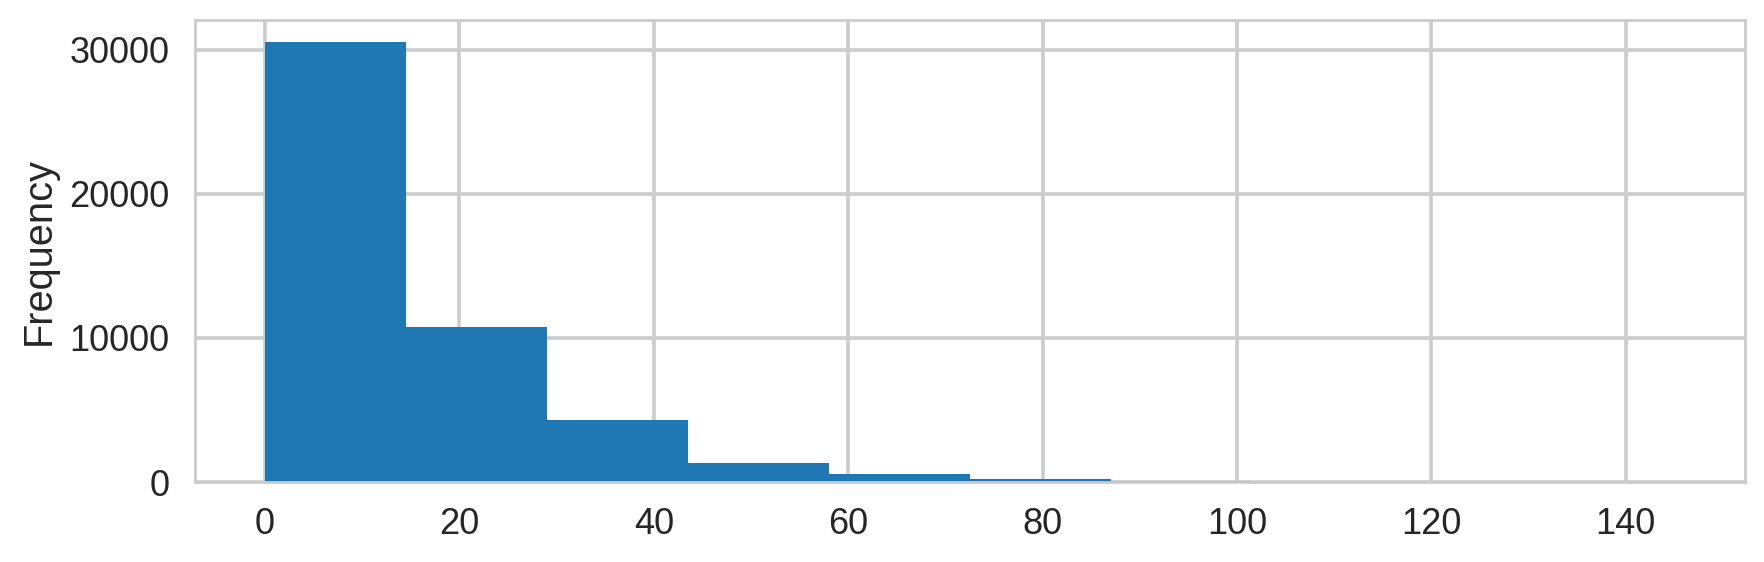

In [22]:
# plot using a histogram can use .hist or plot(kind='hist)
inspections['SCORE'].plot.hist()

<Axes: ylabel='Frequency'>

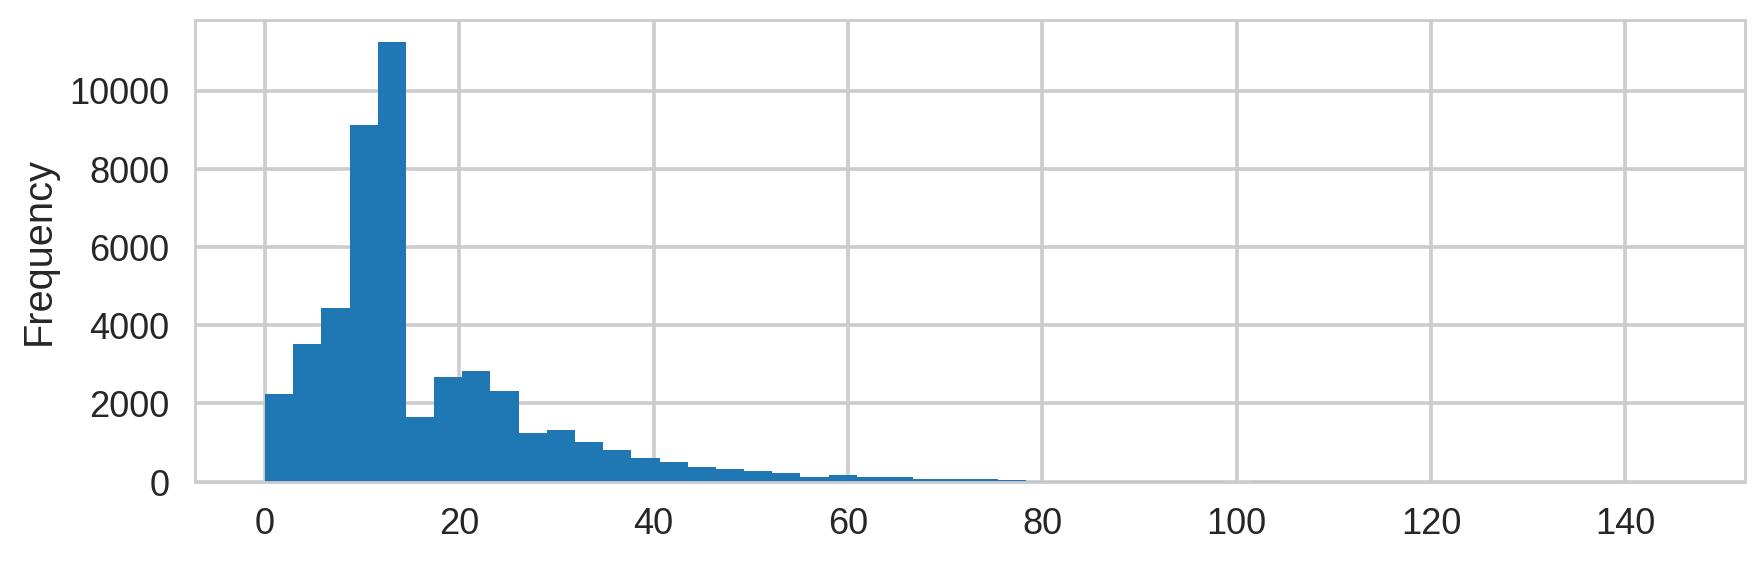

In [23]:
#alter the size of bins
inspections['SCORE'].plot.hist(bins=50)

<Axes: ylabel='Frequency'>

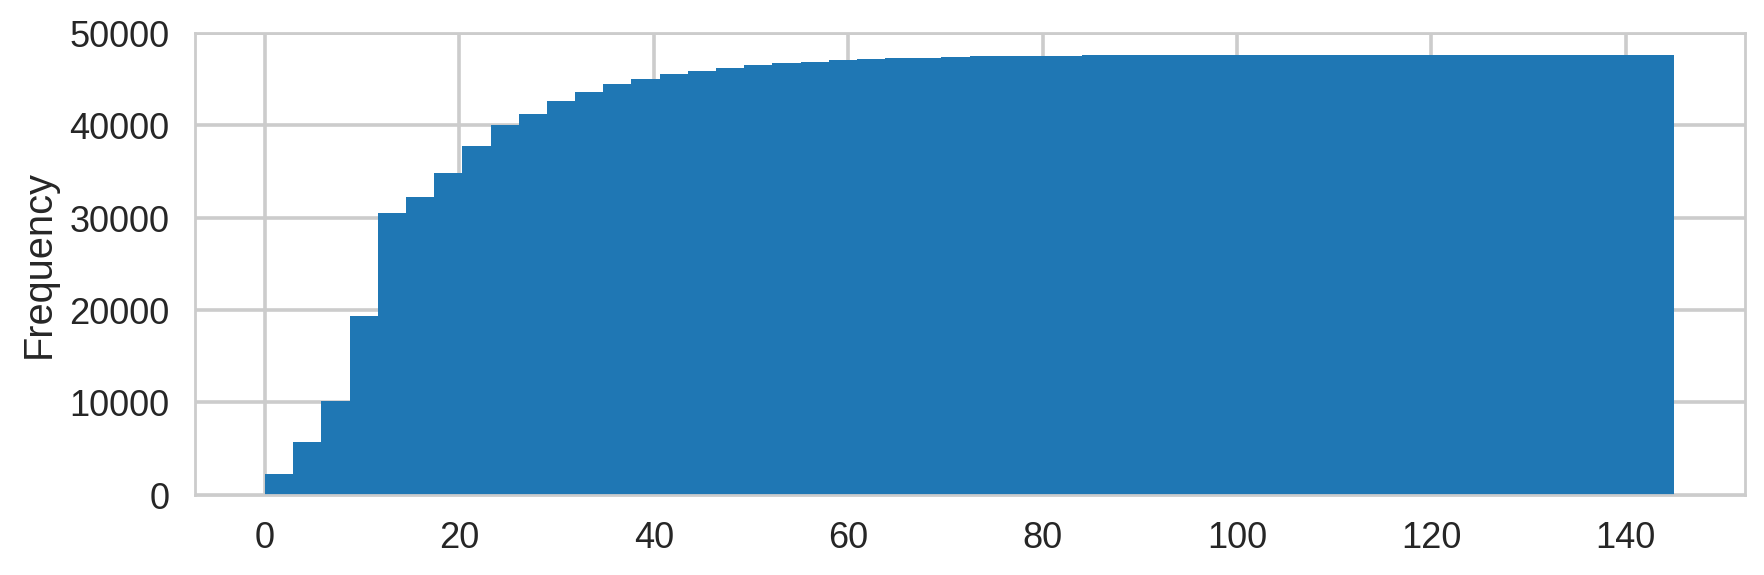

In [24]:
#using cumulative option to see scores below a particular value
inspections['SCORE'].plot.hist(bins=50, cumulative=True)

<Axes: ylabel='Frequency'>

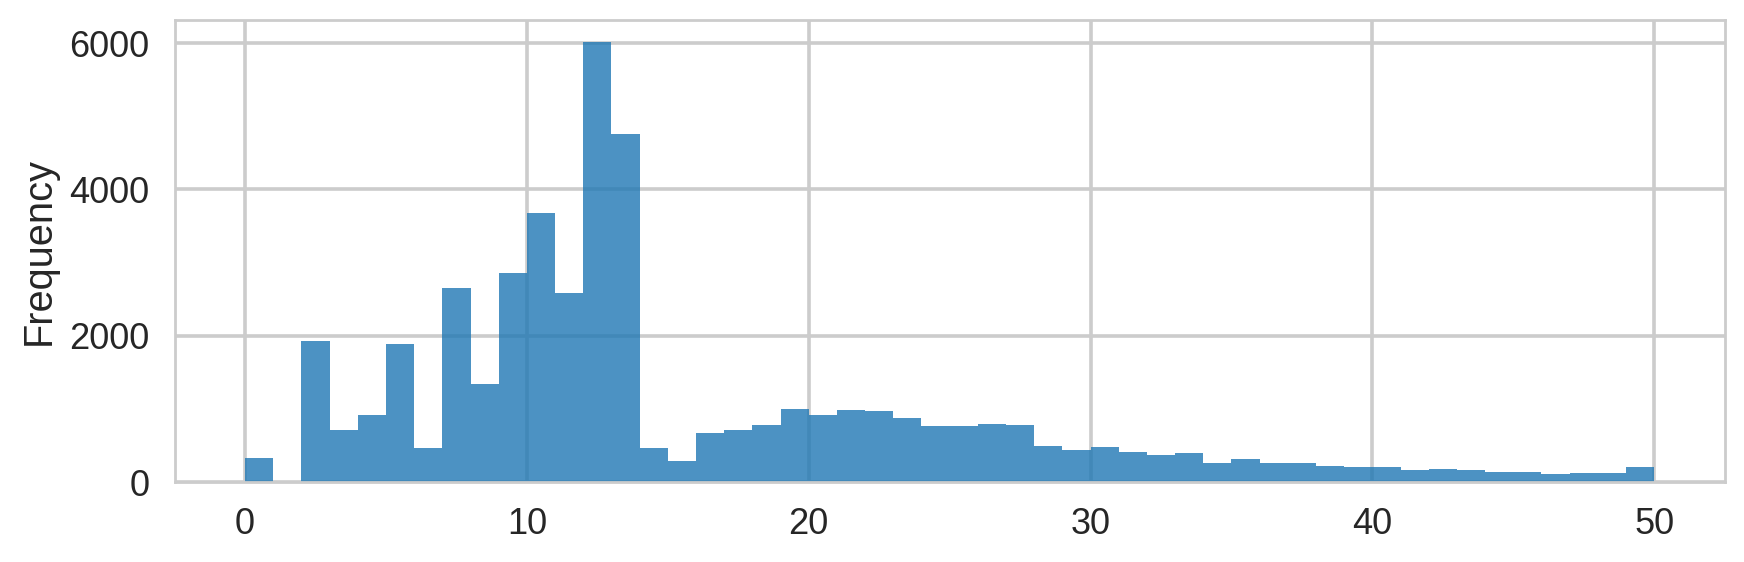

In [25]:
# additional options of the hist function
inspections['SCORE'].plot.hist(
    bins = 50,            # Use 50 bars
    range = (0, 50),      # only consider scores from 0-50
    density = False,      # show normalized count (desity = True), or raw counts (density = False)
    figsize = (10, 3),    # controls the size of the plot
    alpha = 0.8,          # make the plot 20% transparent
)

<Axes: ylabel='Frequency'>

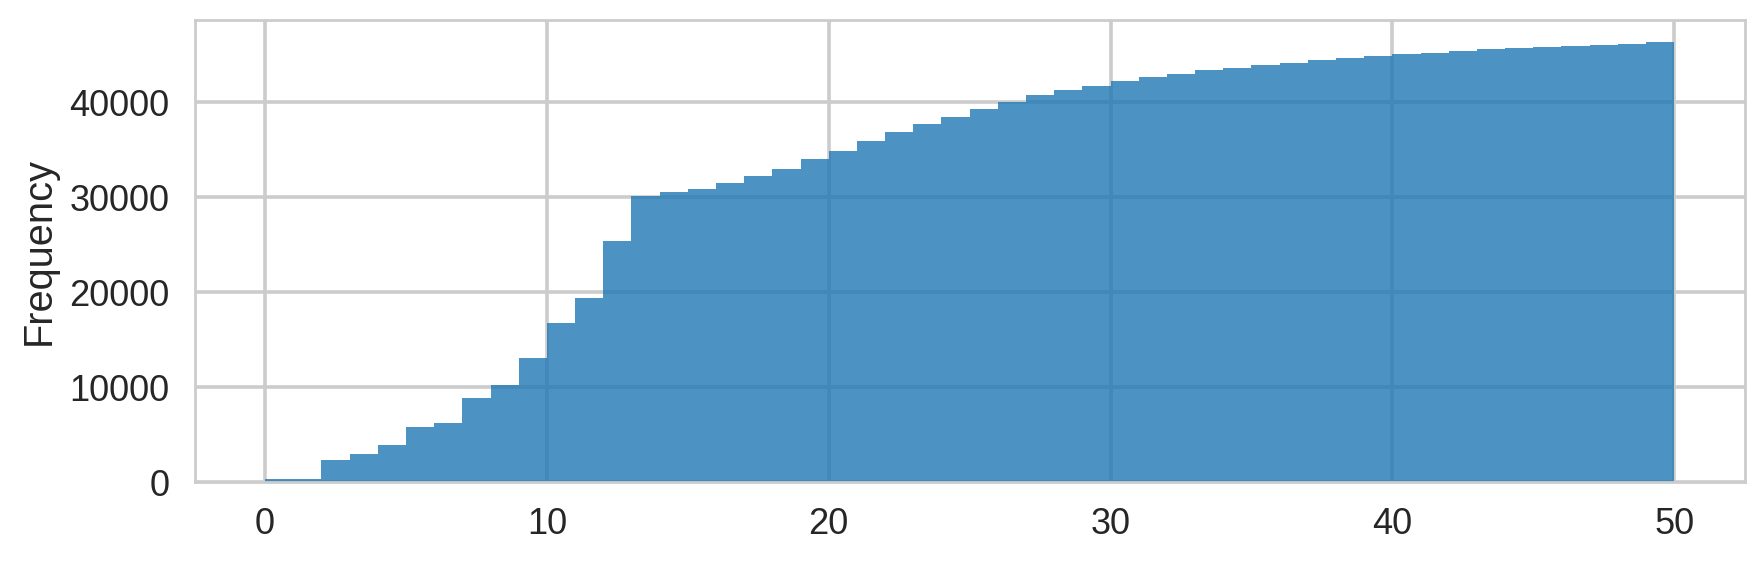

In [26]:
# make it cumulative
inspections['SCORE'].plot.hist(
    bins = 50,            # Use 50 bars
    range = (0, 50),      # only consider scores from 0-50
    density = False,      # show normalized count (desity = True), or raw counts (density = False)
    cumulative = True,    #changes graph to cum
    figsize = (10, 3),    # controls the size of the plot
    alpha = 0.8,          # make the plot 20% transparent
)

<Axes: ylabel='Frequency'>

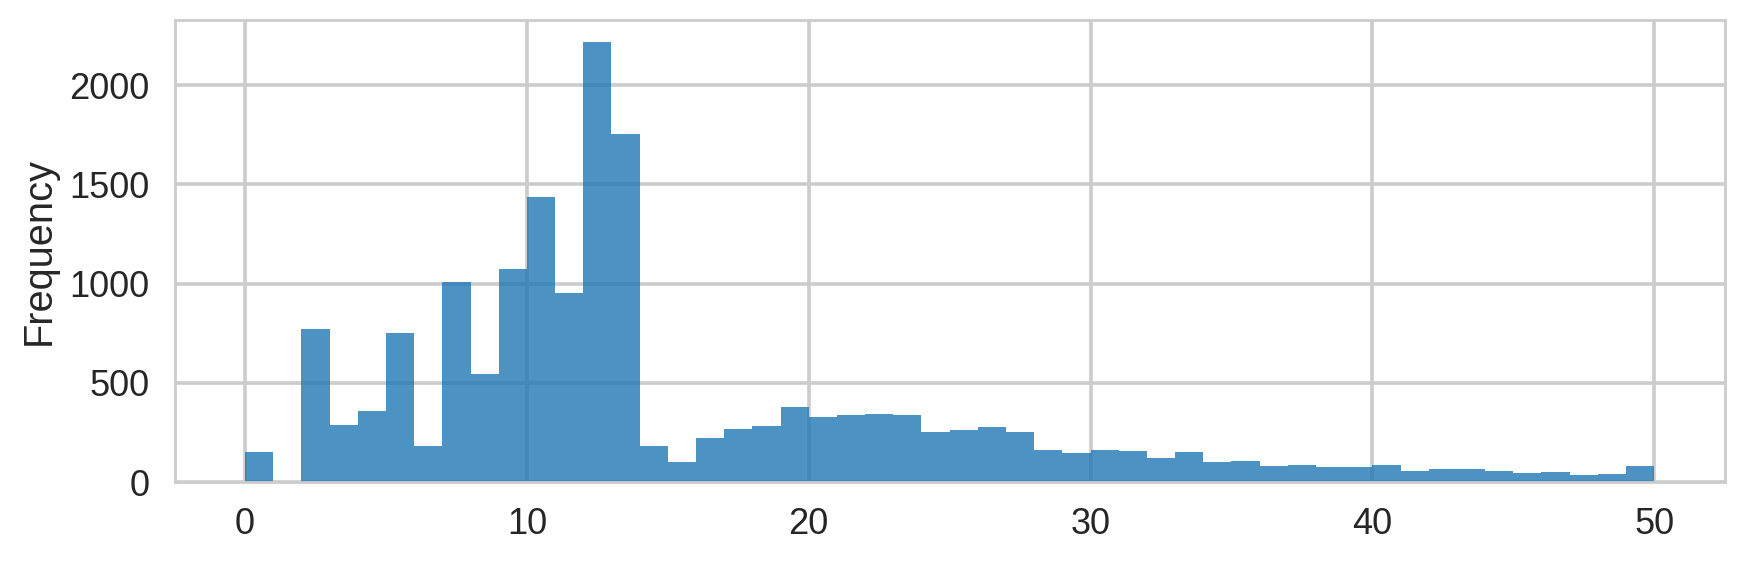

In [27]:
# Manhattan Inspections
mnahat_insp['SCORE'].plot.hist(
    bins = 50,            # Use 50 bars
    range = (0, 50),      # only consider scores from 0-50
    density = False,      # show normalized count (desity = True), or raw counts (density = False)
    cumulative = False,    #changes graph to cum
    figsize = (10, 3),    # controls the size of the plot
    alpha = 0.8,          # make the plot 20% transparent
)

<Axes: ylabel='Frequency'>

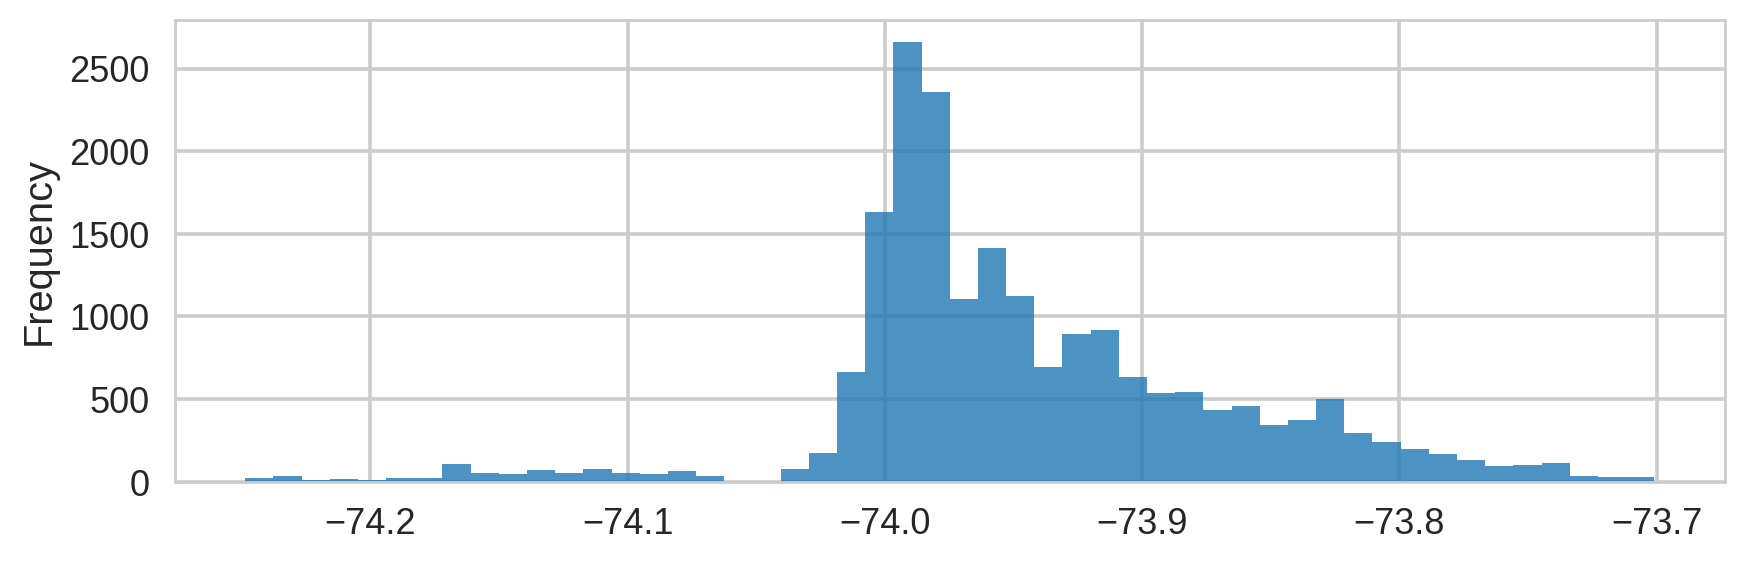

In [28]:
# Restaurants Long hist
restaurants['LONGITUDE'].plot.hist(
    bins = 50,            # Use 50 bars
    #range = (0, 50),      # only consider scores from 0-50
    density = False,      # show normalized count (desity = True), or raw counts (density = False)
    cumulative = False,    #changes graph to cum
    figsize = (10, 3),    # controls the size of the plot
    alpha = 0.8,          # make the plot 20% transparent
)

<Axes: ylabel='Frequency'>

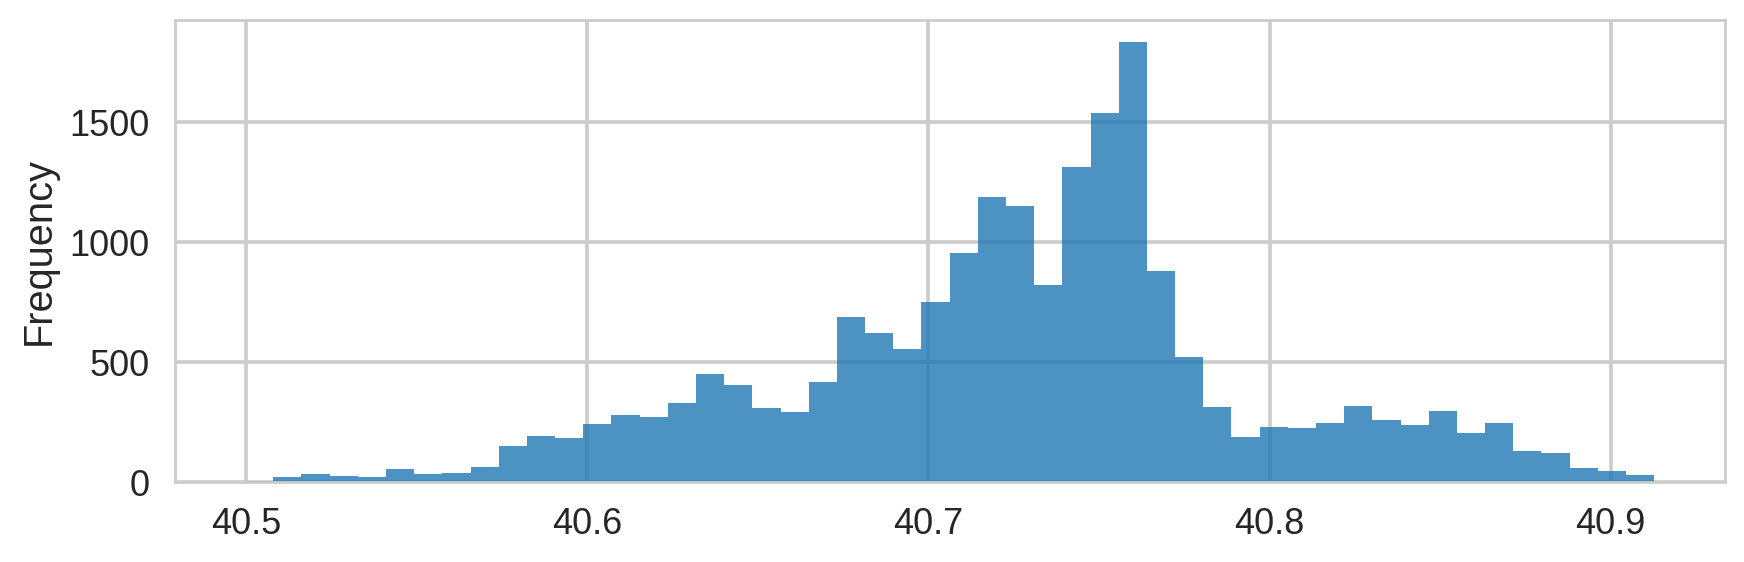

In [29]:
# restaurnat Lat hist
restaurants['LATITUDE'].plot.hist(
    bins = 50,            # Use 50 bars
    #range = (0, 50),      # only consider scores from 0-50
    density = False,      # show normalized count (desity = True), or raw counts (density = False)
    cumulative = False,    #changes graph to cum
    figsize = (10, 3),    # controls the size of the plot
    alpha = 0.8,          # make the plot 20% transparent
)

<Axes: ylabel='Frequency'>

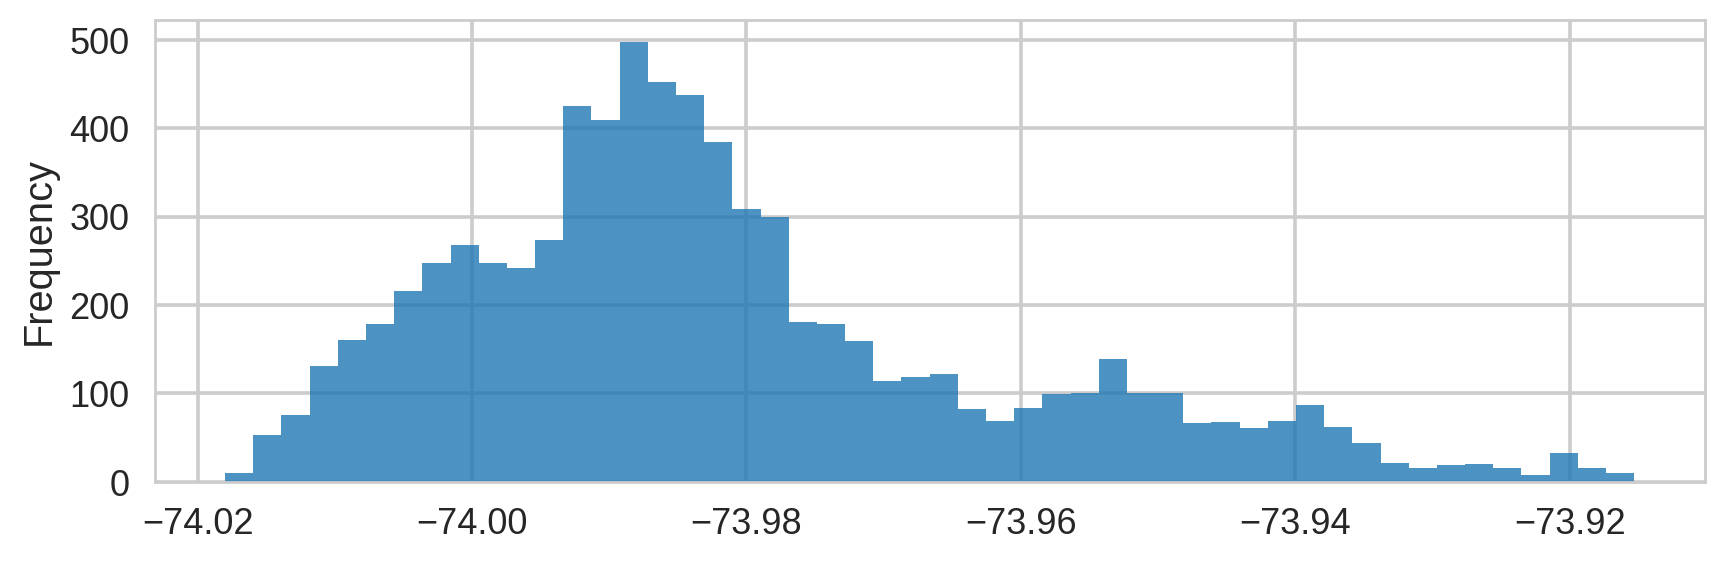

In [30]:
# Manh Rest Long
manhat_rest['LONGITUDE'].plot.hist(
    bins = 50,            # Use 50 bars
    #range = (0, 50),      # only consider scores from 0-50
    density = False,      # show normalized count (desity = True), or raw counts (density = False)
    cumulative = False,    #changes graph to cum
    figsize = (10, 3),    # controls the size of the plot
    alpha = 0.8,          # make the plot 20% transparent
)

<Axes: ylabel='Frequency'>

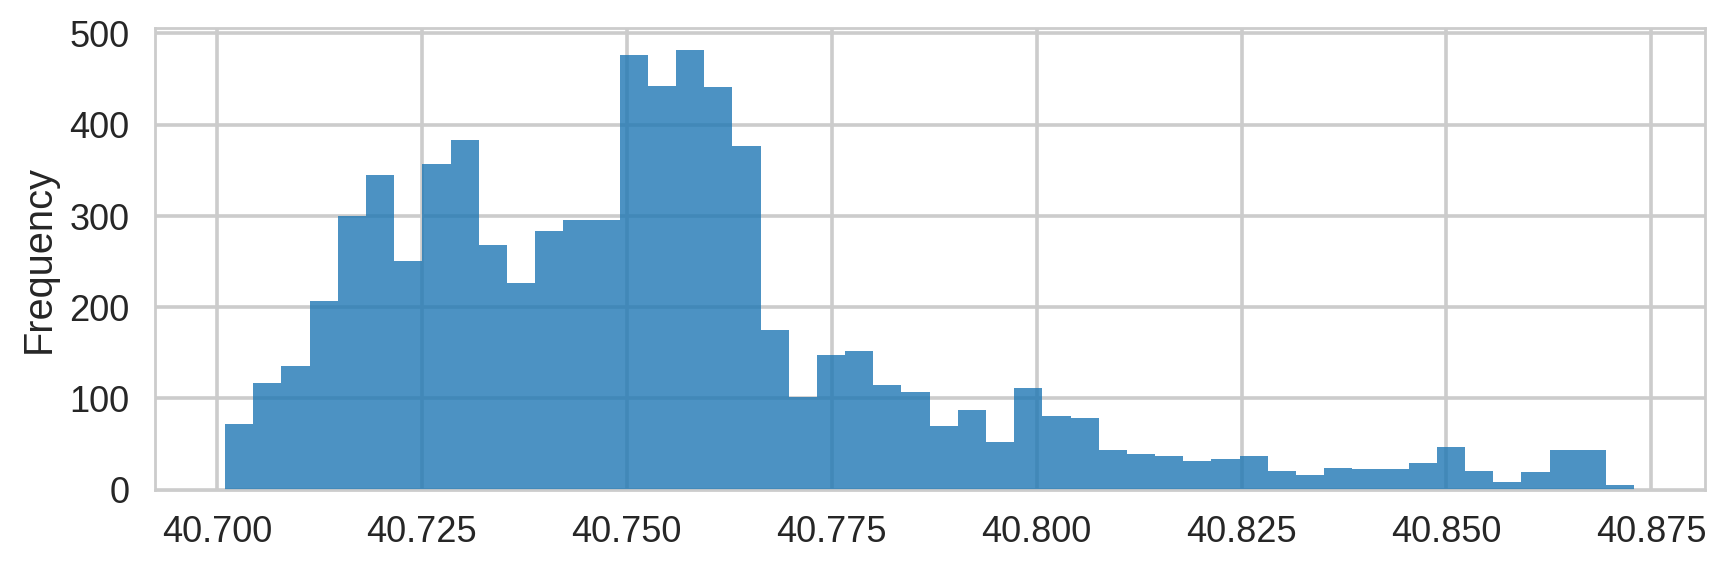

In [32]:
# Manh Rest Lat
manhat_rest['LATITUDE'].plot.hist(
    bins = 50,            # Use 50 bars
    #range = (0, 50),      # only consider scores from 0-50
    density = False,      # show normalized count (desity = True), or raw counts (density = False)
    cumulative = False,    #changes graph to cum
    figsize = (10, 3),    # controls the size of the plot
    alpha = 0.8,          # make the plot 20% transparent
)

<Axes: ylabel='Density'>

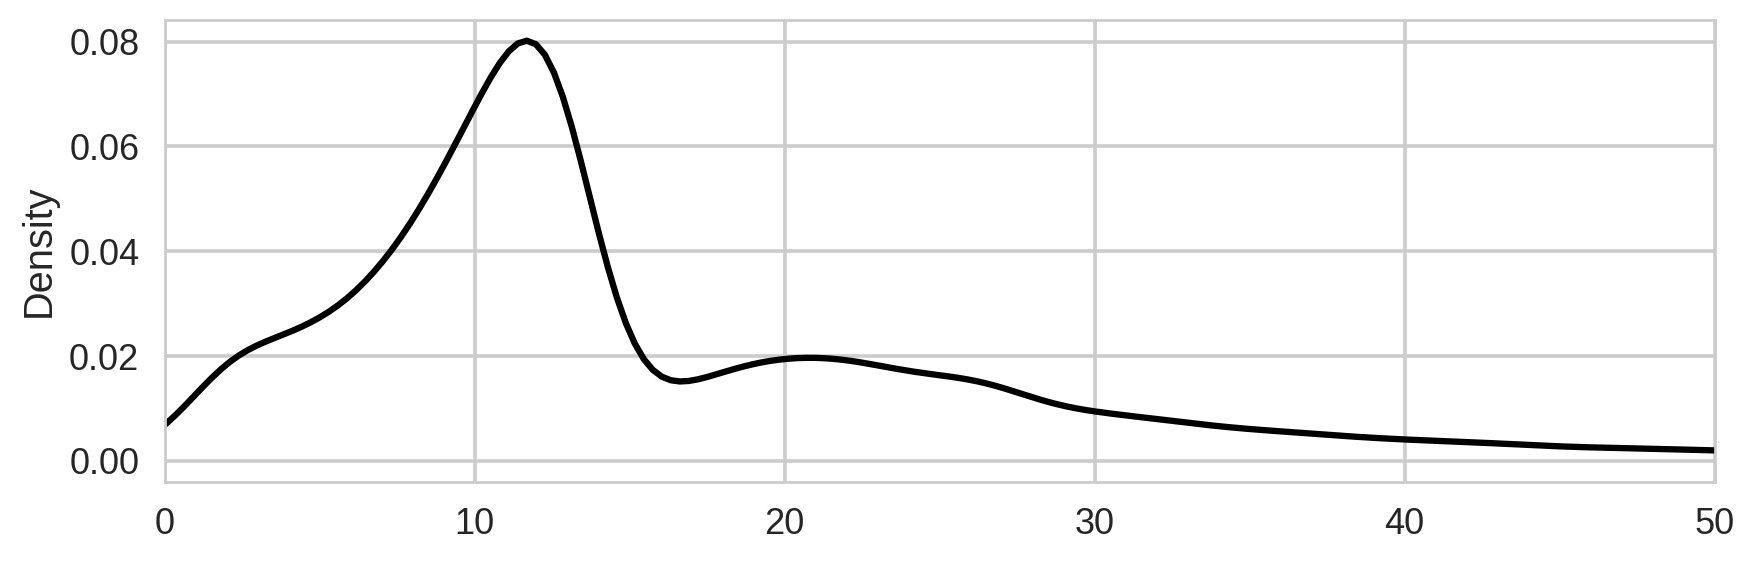

In [31]:
#kernel Desity estimation (KDE), estimates a continous functions instead of the bucketized coutns
inspections['SCORE'].plot(kind = 'kde', color = 'Black', xlim = (0, 50), figsize=(10,3))

#combine plots
save plot as variable and passing the parameter

<Axes: ylabel='Density'>

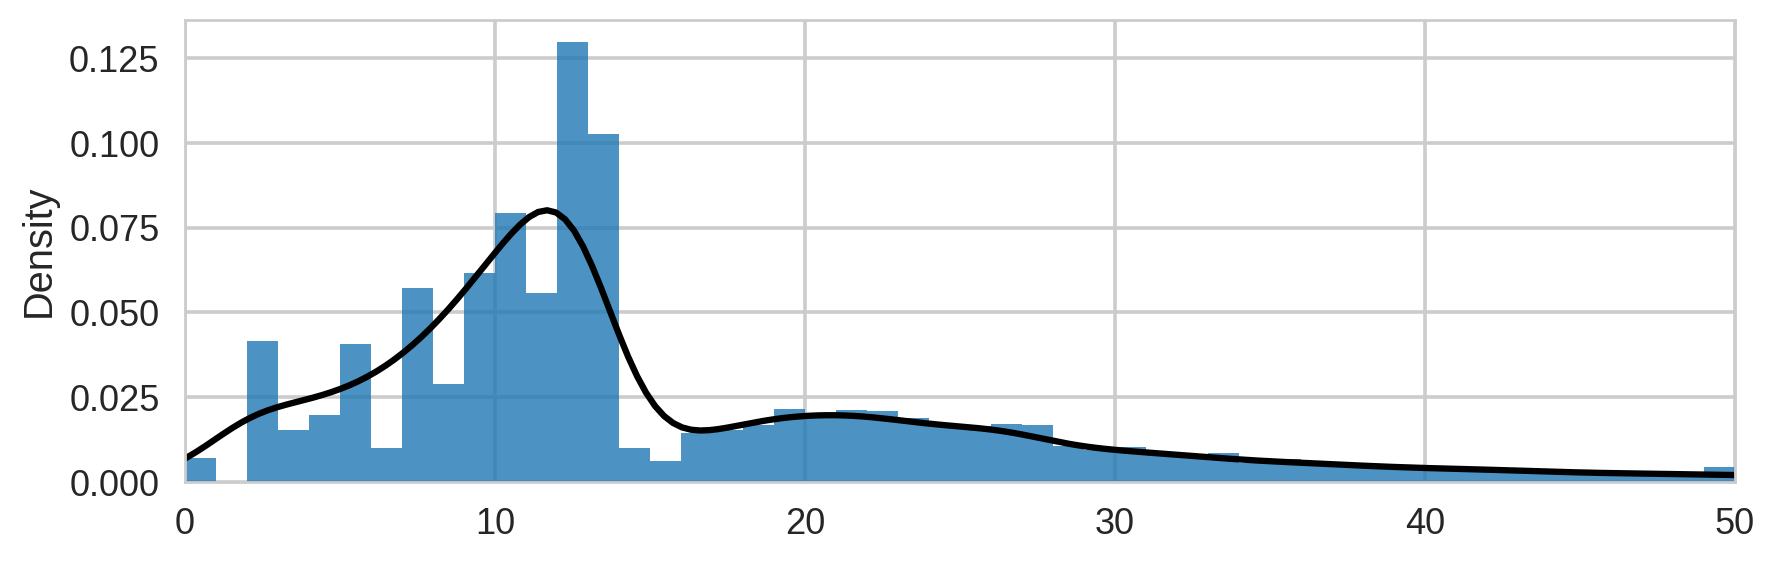

In [36]:
# We save the plot in the variable
histo_fig = inspections['SCORE'].plot.hist(
    bins= 50, # use50 bars
    range=(0, 50), # x axis from 0-50
    density = True, # show normalized count (density = true), or raw counts (density = false)
    figsize = (10, 3), # controls the size of the plot
    alpha = 0.8 # make plot 20%transparent
)

# to comnine the plots, we pass the ax = histo
inspections['SCORE'].plot(
    kind='kde',
    color = 'black',
    xlim = (0, 50),
    figsize = (10, 3),
    ax= histo_fig # we plot this figure on the top
)

<Axes: ylabel='Density'>

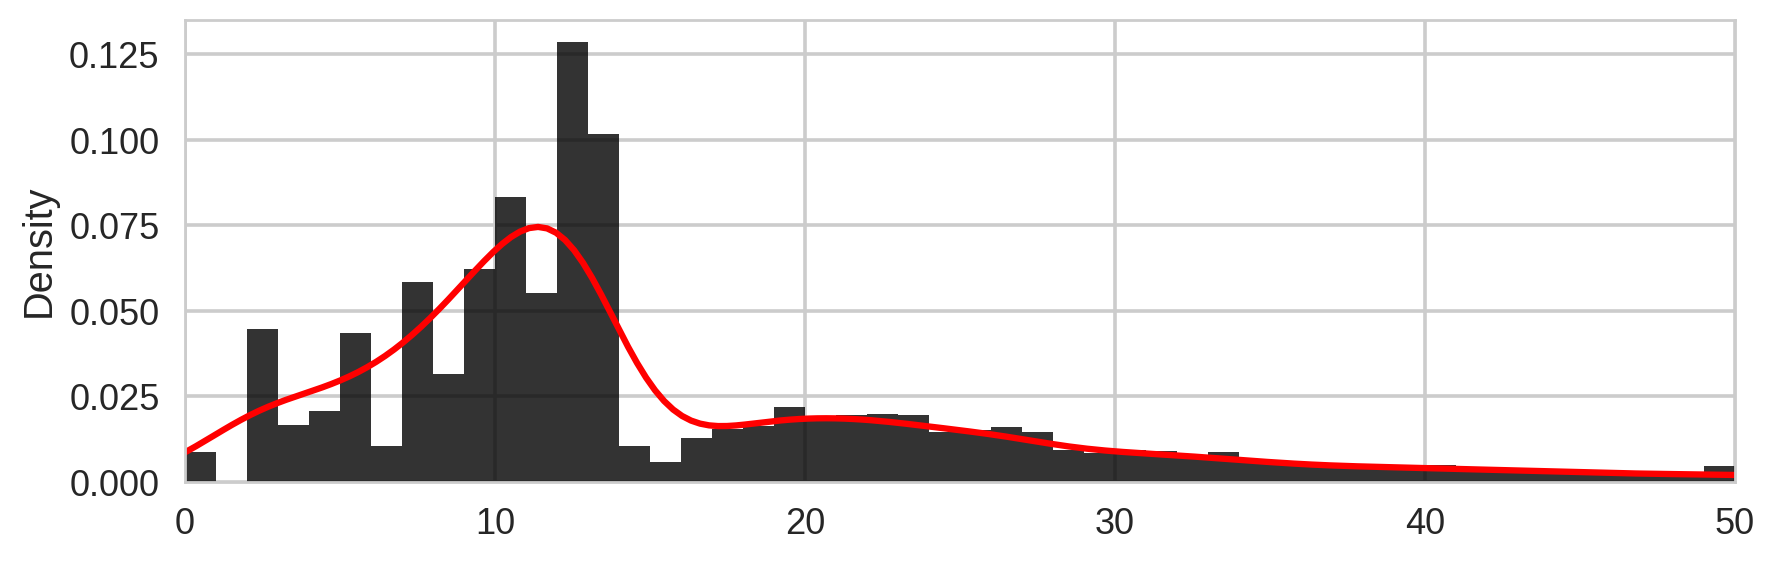

In [46]:
# We save the plot in the variable
hist_ins = mnahat_insp['SCORE'].plot.hist(
    bins= 50, # use50 bars
    color = 'black',
    range=(0, 50), # x axis from 0-50
    density = True, # show normalized count (density = true), or raw counts (density = false)
    figsize = (10, 3), # controls the size of the plot
    alpha = 0.8 # make plot 20%transparent
)

# to comnine the plots, we pass the ax = histo
mnahat_insp['SCORE'].plot(
    kind='kde',
    color = 'red',
    xlim = (0, 50),
    figsize = (10, 3),
    #alpha = 0.95,
    ax= hist_ins # we plot this figure on the top
)

Plotting geographical position

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

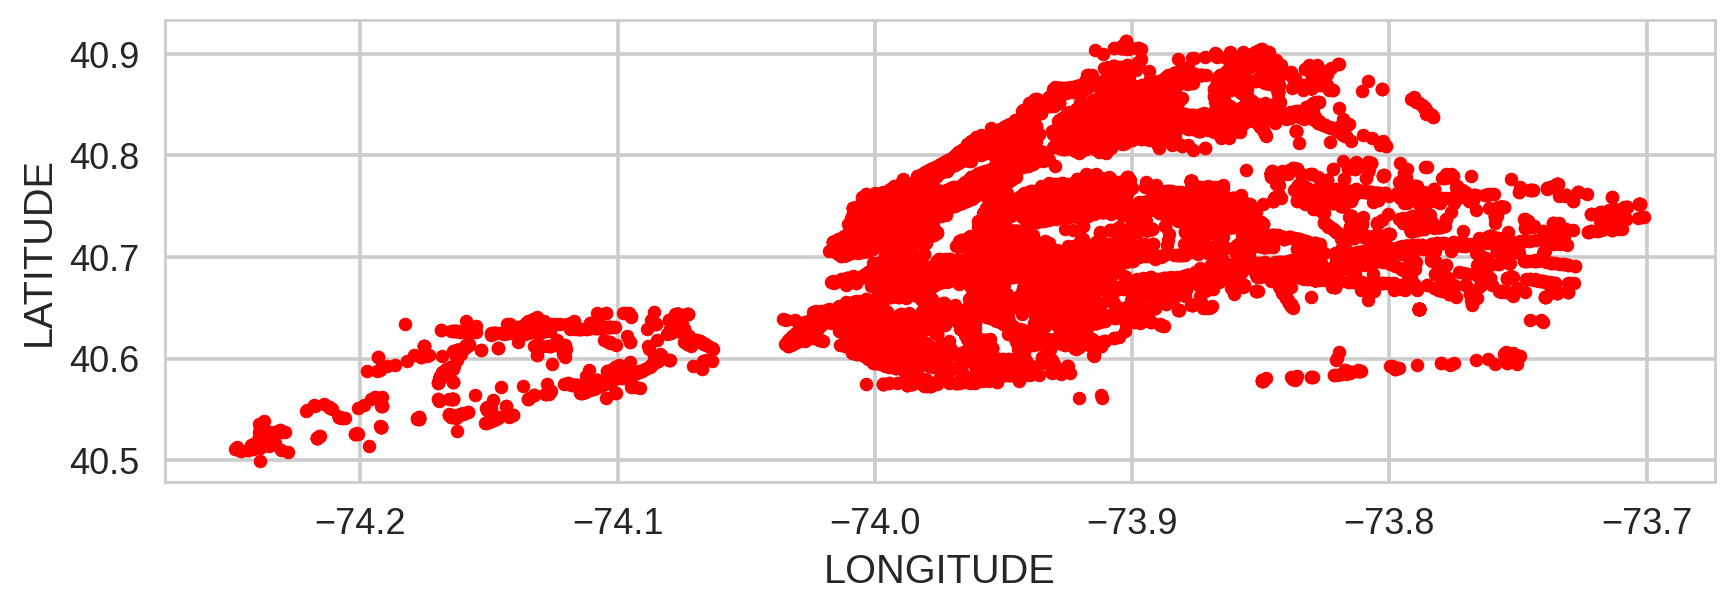

In [47]:
restaurants.plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    c = 'Red', # sets the color for the dots
    #s = 0.25 #keeps the size of each dot small
    # figsize = (8, 8) # resise the figure
    #alpha = 0.5 # makes the dots transparent
)

# Descriptive statistics
categorical and string columns


In [71]:
restaurants['CUISINE_DESCRIPTION'].value_counts()

,count
CUISINE_DESCRIPTION,
American,3899
Chinese,1634
Coffee/Tea,1505
Pizza,1240
Italian,788
...,...
Iranian,2
Haute Cuisine,1
Californian,1


In [73]:
# show the top 10
restaurants['CUISINE_DESCRIPTION'].value_counts().head(10)

,count
CUISINE_DESCRIPTION,
American,3899
Chinese,1634
Coffee/Tea,1505
Pizza,1240
Italian,788
Mexican,732
Latin American,706
Bakery Products/Desserts,702
Japanese,676


<Axes: ylabel='CUISINE_DESCRIPTION'>

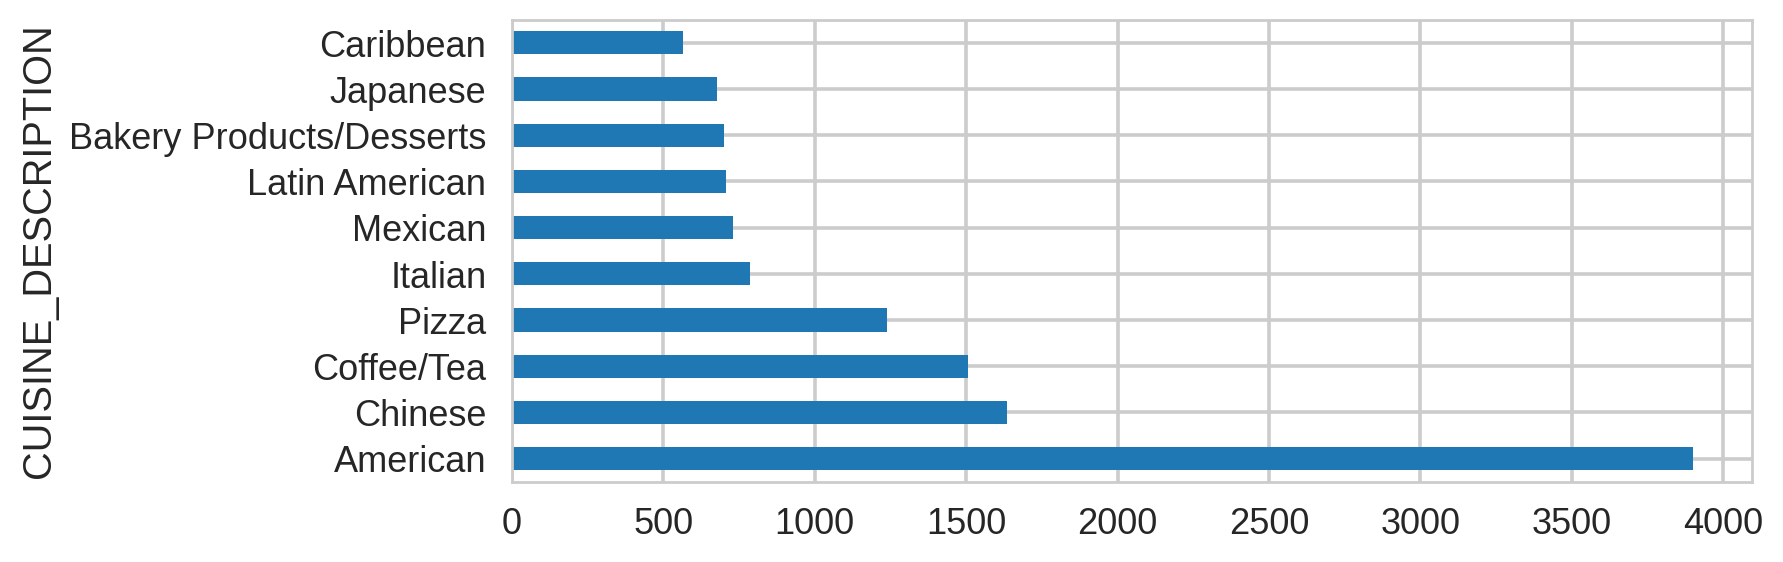

In [74]:
''' Horizontal bar chart (BARH)
clearer labels'''
restaurants['CUISINE_DESCRIPTION'].value_counts().head(10).plot(kind='barh',figsize=(8,3))

<Axes: ylabel='CUISINE_DESCRIPTION'>

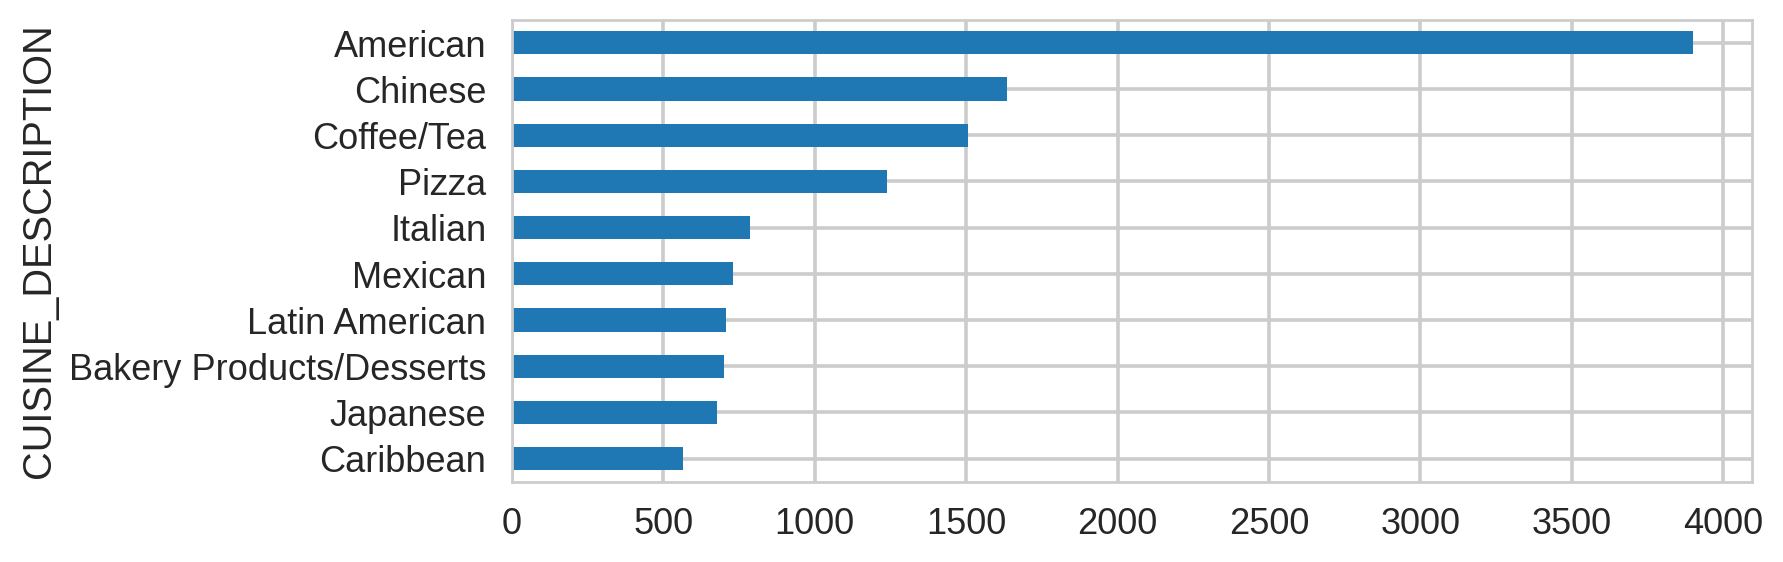

In [77]:
# sort values

restaurants['CUISINE_DESCRIPTION'].value_counts().head(10).sort_values().plot(kind='barh',figsize=(8,3))

<Axes: ylabel='DBA'>

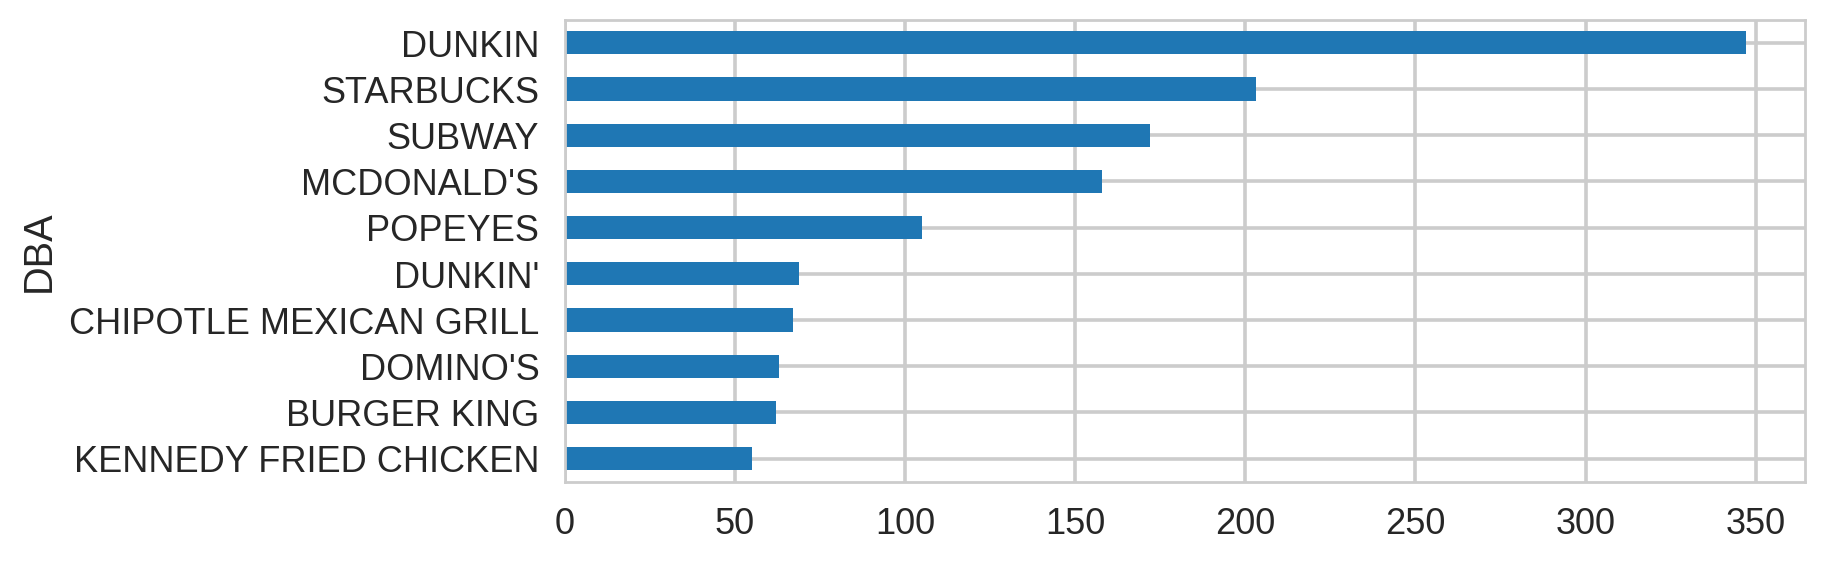

In [81]:
#plot with the frequency of restaurant names (i.e., DBA variable in the restaurants dataframe).

restaurants['DBA'].value_counts().head(10).sort_values().plot(kind='barh',figsize=(8,3))

<Axes: ylabel='DBA'>

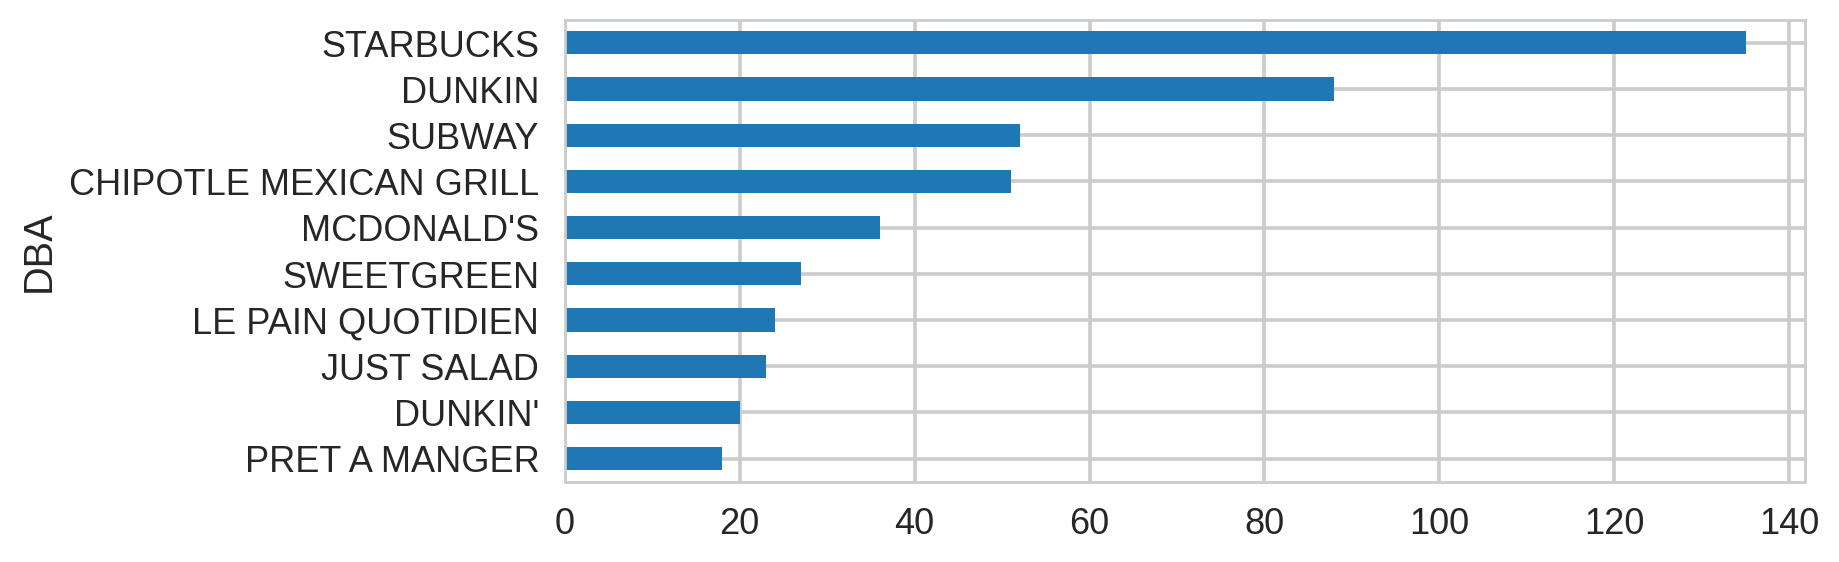

In [80]:
#manhat restaurant dba
manhat_rest['DBA'].value_counts().head(10).sort_values().plot(kind='barh',figsize=(8,3))

<Axes: ylabel='VIOLATION_CODE'>

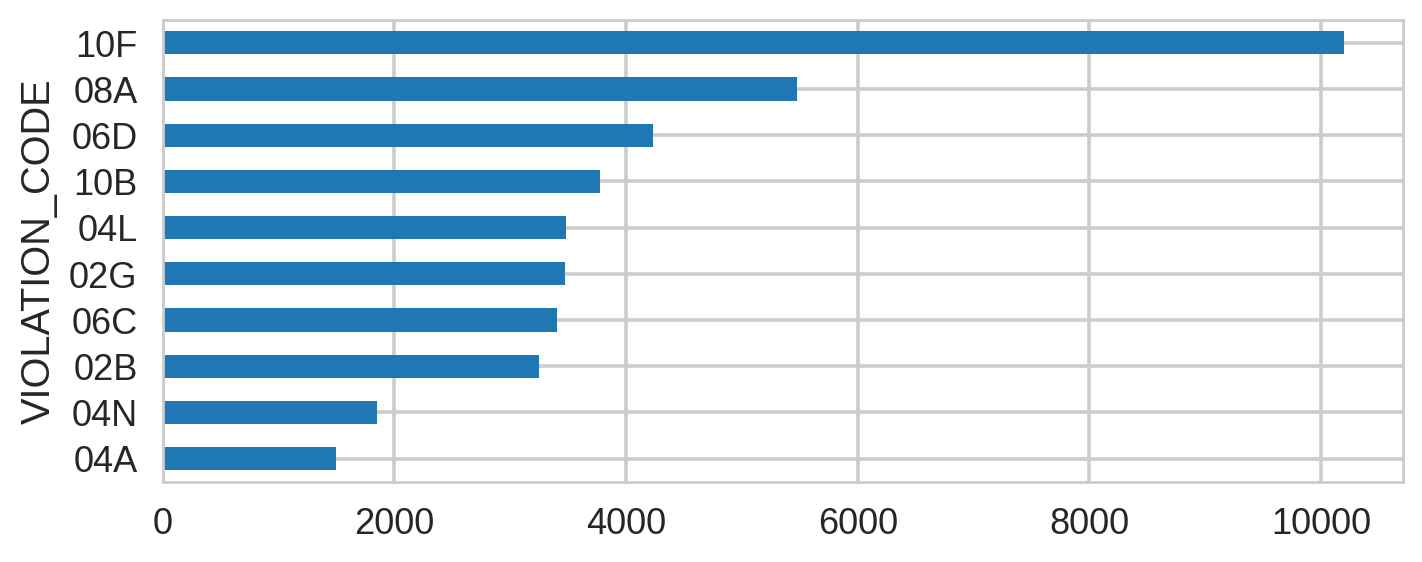

In [82]:
# inspections for each resturant
violations['VIOLATION_CODE'].value_counts().head(10).sort_values().plot(kind='barh',figsize=(8,3))



In [85]:
with engine.connect() as connection:
    sql = 'SELECT * FROM violation_codes'
    vi_codes = pd.read_sql(text(sql), con=connection)
    vi_codes

print(vi_codes)

   VIOLATION_CODE                                        DESCRIPTION  \
0             02A  Time/Temperature Control for Safety (TCS) food...   
1             02B     Hot TCS food item not held at or above 140 °F.   
2             02C  Hot TCS food item that has been cooked and  co...   
3             02D  Commercially processed pre-cooked TCS in herme...   
4             02F  Meat, fish or molluscan shellfish served raw o...   
..            ...                                                ...   
67            22F                            MISBRANDED AND LABELING   
68            22G  Sale or use of certain expanded polystyrene it...   
69          28-05  Food adulterated or misbranded. Adulterated or...   
70          28-06  Contract with a pest management professional n...   
71          28-07    Unapproved outdoor, street or sidewalk cooking.   

        CRITICAL  
0       Critical  
1       Critical  
2       Critical  
3       Critical  
4       Critical  
..           ...  
67

In [86]:
with engine.connect() as connection:
    sql = 'SELECT i.*, v.* FROM violation_codes as i JOIN violations v on v.VIOLATION_CODE = i.VIOLATION_CODE'
    vi_codes = pd.read_sql(text(sql), con=connection)
    vi_codes

print(vi_codes)

       VIOLATION_CODE                                        DESCRIPTION  \
0                 10B  Anti-siphonage or back-flow prevention device ...   
1                 10F  Non-food contact surface or equipment made of ...   
2                 05D  No hand washing facility in or adjacent to toi...   
3                 10B  Anti-siphonage or back-flow prevention device ...   
4                 10I  Single service item reused, improperly stored,...   
...               ...                                                ...   
150959            06C  Food, supplies, and equipment not protected fr...   
150960            04A  Food Protection Certificate (FPC) not held by ...   
150961            08A  Facility not vermin proof. Harborage or condit...   
150962            04L  Evidence of mice or live mice in establishment...   
150963            08A  Facility not vermin proof. Harborage or condit...   

            CRITICAL INSPECTION_ID VIOLATION_CODE  
0       Not Critical             0 

In [94]:
# inspections for each resturant
vi_codes['DESCRIPTION'].value_counts().head(10).sort_values()

,count
DESCRIPTION,
Food Protection Certificate (FPC) not held by manager or supervisor of food operations.,4167
"Filth flies or food/refuse/sewage-associated (FRSA) flies present in facility’s food and/or non-food areas. Filth flies include house flies, little house flies, blow flies, bottle flies and flesh flies. Food/refuse/sewage-associated flies include fruit flies, drain flies and Phorid flies.",6818
"Food, supplies, and equipment not protected from potential source of contamination during storage, preparation, transportation, display or service.",8504
Hot TCS food item not held at or above 140 °F.,8599
Anti-siphonage or back-flow prevention device not provided where required; equipment or floor not properly drained; sewage disposal system in disrepair or not functioning properly. Condensation or liquid waste improperly disposed of.,8637
Cold TCS food item held above 41 °F; smoked or processed fish held above 38 °F; intact raw eggs held above 45 °F; or reduced oxygen packaged (ROP) TCS foods held above required temperatures except during active necessary preparation.,9875
Evidence of mice or live mice in establishment's food or non-food areas.,10580
"Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.",11451
Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.,16938


<Axes: ylabel='ZIPCODE'>

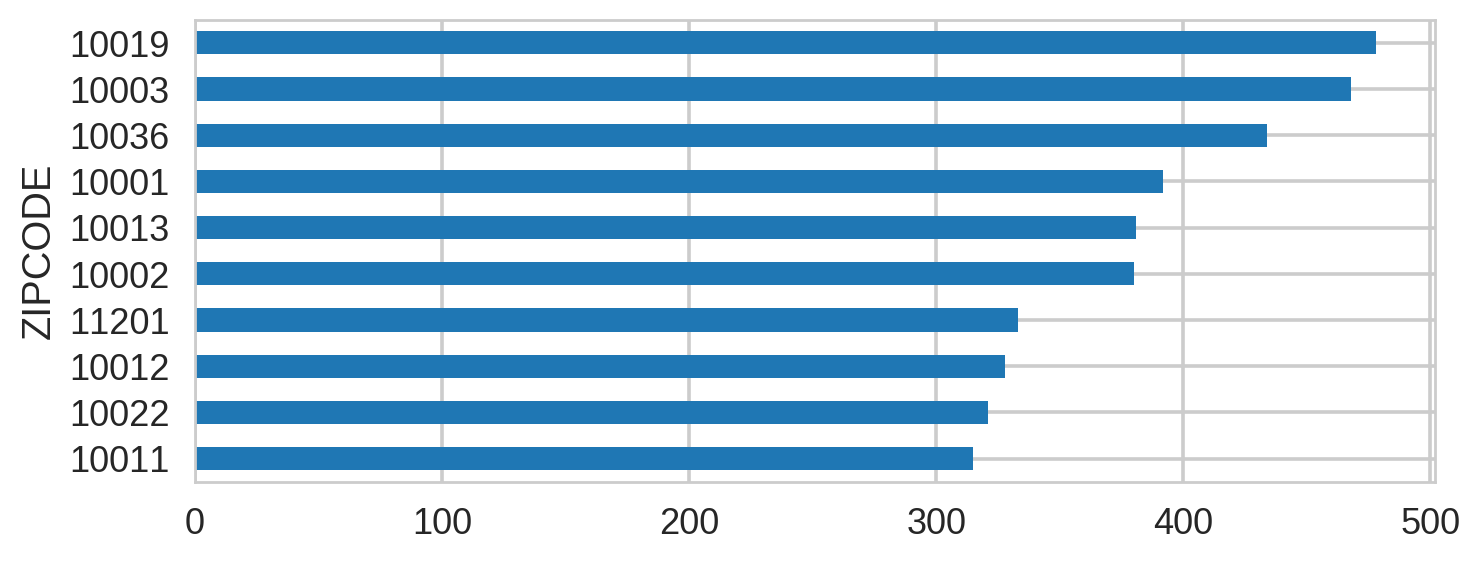

In [96]:
# inspections for each resturant
restaurants['ZIPCODE'].value_counts().head(10).sort_values().plot(kind='barh',figsize=(8,3))

<Axes: ylabel='BORO'>

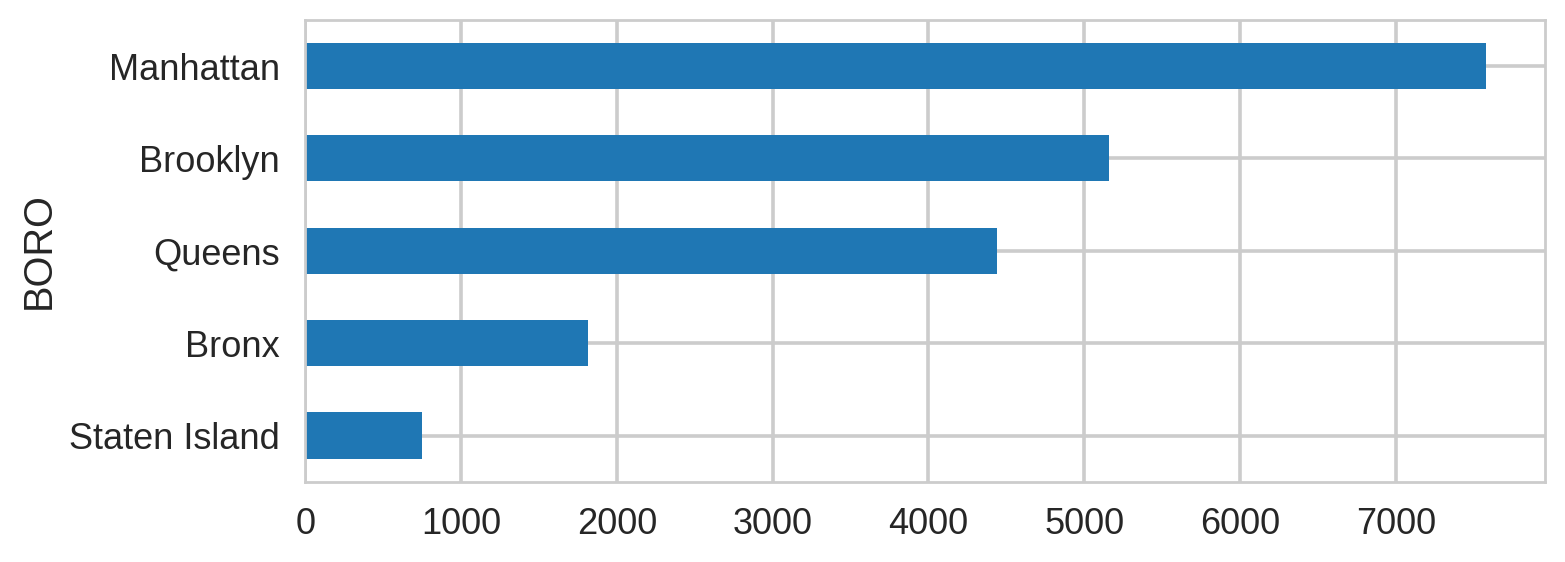

In [99]:
# inspections for each resturant
restaurants['BORO'].value_counts().head(10).sort_values().plot(kind='barh',figsize=(8,3))